# 2. Channel coding and detection: MAP and ML  

## Detection basics

Let $u^k$ be a binary sequence which is to be transmitted through $n$ channel accesses to a memoryless noisy channel defined by a probability density $P_{Y|X}$, i.e. the channel takes as input the sequence $x^n$ and outputs a sequence $y^n$ with probability

$$ P(y^n|x^n) = \prod_{i=1}^n P_{Y|X} (y_i |x_i). $$ 

The sequence $u^k$ is mapped to the sequence $x^n$ through a mapping which could be an error correction code $f_e(\cdot)$ concatenated with a constellation mapping. 

<img src="figs/ShannonPointToPoint.png" width="600">

Our purpose is to detect from the received sequence $y^n$, an estimate $\hat{u}^k$ of the initially transmitted sequence $u^k$. To this end, the receiver consists in a detection rule $f_d(\cdot)$ which assigns to each sequence $y^n$ an estimate $\hat{u}^k = f_d(y^n)$. 

N.B: In this course, we will focus only on deterministic detection rules. 


## Probability of error: misdetection 

To evaluate the performance of any detection rule $f_d(\cdot)$, one needs to evaluate the average probability of error. We can define two types of error probabilities: the sequence (block) error probability and the bit error probability: 

- The sequence error probability is defined as 
$$ P_s(f_d) = \mathbb{P} \left(\hat{U}^k \neq U^k \right).$$

- The bit error probability is defined as 
$$ P_b(f_d) = \dfrac{1}{k} \sum_{i=1} \mathbb{P} \left(\hat{U}_i \neq U_i\right).$$
    
Question: What is random in the computation of the error probabilities ? 

**Answer:** The noisy channel

In practice, the sequence error probability is approximated through Monte Carlo simulations with the Frame Error Rate (FER), or Packet Error Rate (PER), whilst the bit error probability is approximated with the Bit Error Rate (BER). 

In the following, we characterize the optimal detectors from both the bit and sequence error probabilities perspectives. 

##  Sequence detection: MAP, APP and ML 

The optimal detection rule $f_d(\cdot)$ which minimizes the sequence probability of error is known as the Maximum A Posteriori (MAP) detector. This detector writes as

$$\hat{u}^k = f_{APP}(y^n) = \underset{u^k}{argmax} \  P\left(u^k| y^n \right)$$

where the probability $P(u^k| y^n)$ is called the A Posterior Probability (APP). 

Question: Express the A Posterior probability $P\left(u^k| y^n \right)$ as a function of the channel probability $P_{Y|X}$, the prior distribution $P\left(u^k \right)$, and the mapping $f_e(\cdot)$. 

**Answer:** 

The FEC encoder is a deterministic and injective function. So, we have the following relation:

$$P\left(y^n| u^k \right) = P\left(y^n| f_e(u^k) \right) = P\left(y^n| x^k \right)$$

Using the Bayes formula :

$$
\begin{align*}
P\left(u^k| y^n \right) 
& = \frac{P\left(y^n| u^k \right)P(u^k)}{P\left(y^n\right)} \\
& = \frac{P\left(y^n| x^k \right)P(u^k)}{P\left(y^n\right)} \\
& = \frac{P(u^k)\prod_{i=1}^n P_{Y|X} (y_i |x_i)}{P\left(y^n\right)} \\
& = \boxed{\frac{P(u^k)\prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i))}{P\left(y^n\right)}}
\end{align*}
$$

Using the total probability formula :

$$
\begin{align*}
P\left(y^n\right) 
& = \sum_{u^k \in~[0;1]^k} P(u^k)P(y^n|u^k) \\
& = \boxed{\sum_{x^n \in~\mathbb{E}} P(u^k)P(y^n|x^n)}
\end{align*}
$$

Where $N$ is the total number of reachable words and $\mathbb E = f_e([0;1]^k)$ is the space of all reachable words from the error corrector code.

In detection theory, we can as well define the so called ML detector given by 

$$\hat{u}^k = f_{ML} (y^n) = \underset{u^k}{argmax} \  P\left(y^n| u^k \right) . $$ 

Question: Under which condition on the prior distribution $P\left(u^k \right) $ are the ML and MAP detectors equivalent? 

**Answer**: According to previous questions


$$
\begin{align*}
f_{APP}(y^n) 
& = \underset{u^k}{argmax} \  P\left(u^k| y^n \right) \\
& = \underset{u^k}{argmax} \ \frac{P(u^k)\prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i))}{P\left(y^n\right)} \\
& = \boxed{\underset{u^k}{argmax} \ P(u^k)\prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i))}
\end{align*}
$$

$$
\begin{align*}
f_{ML} (y^n) 
& = \underset{u^k}{argmax} \  P\left(y^n| u^k \right) \\
& = \boxed{\underset{u^k}{argmax} \ \prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i))}
\end{align*}
$$ 

If $u^k$ follow an uniform repartition, we have $P(u^k) = \dfrac{1}{2^k}$.

So 
$$f_{APP}(y^n) = \underset{u^k}{argmax} \ \frac{1}{2^k} \prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i)) = \prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i)) = f_{ML} (y^n)$$

Now, if we suppose $f_{APP}(y^n) = f_{ML} (y^n)$ then 
$$\underset{u^k}{argmax} \ P(u^k)\prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i))=\underset{u^k}{argmax} \ \prod_{i=1}^n P_{Y|X} (y_i |f_{e_i}(u_i))$$
So for the two argmax to be equal $P(u^k)$ needs to be independant of sequence $u^k$ so it must follow a uniform repartition with $P(u^k)=\dfrac{1}{2^k}$

Question: Do you know of an algorithm which implements the sequence MAP detector? 

**Answer**: The BCJR algorithm

Question: Consider a Gaussian channel with variance $\sigma^2$, i.e.,

  $$ P(y|x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \dfrac{-(y-x)^2}{2 \sigma^2} \right) , $$

over which we wish to communicate a binary sequence of length $k$.

Question: Write the sequence MAP criterion for a mapping $f_e(\cdot)$ under the assumption of a uniform prior distribution $P(u^k) = 2^{-k} $. 


**Answer**:  

$$
\begin{align*}
f_{APP}(y^n) 
& = \underset{u^k}{argmax} \prod_{i=1}^n P_{Y|X} (y_i^n |f_{e_i}(u^k)) \\
& = \underset{u^k}{argmax}\prod_{i=1}^n \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \dfrac{-(y_i^n-f_{e_i}(u^k))^2}{2 \sigma^2} \right) \\
& = \underset{u^k}{argmax} \sum_{i=1}^n-(y_i^n-f_{e_i}(u^k))^2 \\
& = \underset{x^n \ \in \ \mathbb E}{argmin}\sum_{i=1}^n d(y_i^n,x_i^n)^2 \\
& = \underset{x^n \ \in \ \mathbb E}{argmin}~d(y^n,x^n)^2 \\
& = \boxed{\underset{x^n \ \in \ \mathbb E}{argmin}~d(y^n,x^n)}
\end{align*}
$$

Where $\mathbb E = f_e([0;1]^k)$ is the space of all reachable words from the error corrector code


Question: Consider a Binary Symmetric Channel with crossover probability $p$, i.e., 

  $$ P(y|x) =  p^{x \oplus y} (1-p)^{1 - x \oplus y}  , $$
  
over which we wish to communicate a binary sequence of length $k$. Write the sequence MAP criterion for a mapping $f_e(\cdot)$ under the assumption of a uniform prior distribution $P(u^k) = 2^{-k} $. 


**Answer**: $$ \underset{u^k}{argmax}~ P(y^n|x^n) = p^{x^n \oplus y^n} (1-p)^{1 - x^n \oplus y^n} = \underset{u^n}{argmax}~\left( \dfrac{p}{1-p}\right)^{x^n \oplus y^n}, $$
Since $p\leq \dfrac{1}{2}$ generally then $\dfrac{p}{1-p}  \in [0;1]$ we have : 
$$\underset{u^k}{argmax}~P(y^n|x^n) = \underset{u^k}{argmin}~{x^n \oplus y^n}=\underset{x^n}{argmin}~d_{Hamming}(y^n,x^n)$$

Question: In the case of uncoded BPSK communication over an AWGN channel, prove that the MAP criterion amounts to a threshold detector and give the value of the threshold. 

**Answer**: 
Let's first consider the transmission of a sequence of one bit over an AWGN channel.

We've shown before that : 
$$
\begin{align*}
f_{APP}(y)
& = \underset{u\in~ \{0,1\}}{argmax}~\dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \dfrac{-(y-f_{e}(u))^2}{2 \sigma^2} \right)\\
& = \underset{x\in~ \{-1,1\}}{argmax}~  \bigg\{ \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \dfrac{-(y+1)^2}{2 \sigma^2} \right) , \dfrac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( \dfrac{-(y-1)^2}{2 \sigma^2} \right) \bigg\}\\
& = \underset{x\in~ \{-1,1\}}{argmin}~\big\{d(y,-1),d(y,1)\big\}\\
& = \underset{x\in~ \{-1,1\}}{argmin}~\big\{(y+1)^2,(y-1)^2\big\}
\end{align*}
$$

Wich give a threshold of $y=0$ (because $(y+1)^2>(y-1)^2 \Rightarrow y>0$)

We can then generalize for a sequence of $k$ bits, we have then a threshold for every $y_i^n$ which is 0.

(With an other constellation mapping the threshold would have been the mean of the mapped symbols, which here is 0 for a BPSK.)

##  Bit detection:  MAP and APP  

The optimal detection rule from a bit error probability is called the bit-MAP detector. This detector writes as: 

$$\hat{u}_i = f_{APP}(y^n) = \underset{u_i}{argmax} \  P(u_i| y^n) . $$

Question: Express the A Posterior probability $P(u_i| y^n)$ as a function of the channel probability $P_{Y|X}$ and the prior distribution $P(u^k)$. 

**Answer:**

$$
\begin{align*}
P(u_i| y^n)
& = \frac{P\left(y^n| u_i \right)P(u_i)}{P\left(y^n\right)} \\
& = \frac{P(u_i) P_{Y|X} (y^n_i | u_i)}{P\left(y^n\right)}
\end{align*}
$$

Question: Do you know of an algorithm to implement the bit-MAP detector? 

**Answer** :
The Viterby Algorithm

## Detection over classical channels

###  1. Uncoded transmissions: AWGN and BSC channels

Based on the communication chain you implemented previously, simulate and compute the BER of the MAP sequence decoder for uncoded communication over an AWGN channel. Compare its performance with the theoretic curve of BER as a function of $E_b/N_0$. Comment. 

Start EbN0 1/20 [-20.0] /500 No FEC matrix specified, auto switch receiver mode to CLASSIC
[86.8 %][173.0 %] | Ended in 0.0 s
Start EbN0 2/20 [-18.53] /500 [84.8 %][166.8 %] | Ended in 0.0 s
Start EbN0 3/20 [-17.05] /500 [85.4 %][171.8 %] | Ended in 0.0 s
Start EbN0 4/20 [-15.58] /500 [84.2 %][165.2 %] | Ended in 0.0 s
Start EbN0 5/20 [-14.11] /500 [80.8 %][156.0 %] | Ended in 0.0 s
Start EbN0 6/20 [-12.63] /500 [68.6 %][142.4 %] | Ended in 0.0 s
Start EbN0 7/20 [-11.16] /500 [68.2 %][134.2 %] | Ended in 0.0 s
Start EbN0 8/20 [-9.68] /500 [69.0 %][133.0 %] | Ended in 0.0 s
Start EbN0 9/20 [-8.21] /500 [59.8 %][119.0 %] | Ended in 0.0 s
Start EbN0 10/20 [-6.74] /500 [46.8 %][99.0 %][152.4 %] | Ended in 0.0 s
Start EbN0 11/20 [-5.26] /500 [45.4 %][86.4 %][129.6 %] | Ended in 0.0 s
Start EbN0 12/20 [-3.79] /500 [40.0 %][77.0 %][118.8 %] | Ended in 0.0 s
Start EbN0 13/20 [-2.32] /500 [25.6 %][52.6 %][80.2 %][112.2 %] | Ended in 0.0 s
Start EbN0 14/20 [-0.84] /500 [17.8 %][38.0 %][59.6 %][7

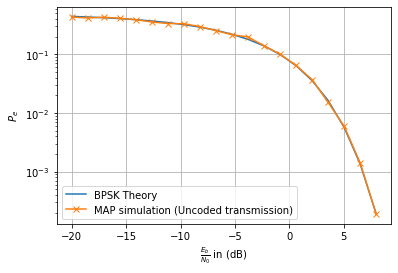

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.communications import Transmitter, AWGNChannel, Receiver
from src.utils import *

# Configuration
MODULATION = 'BPSK'
EbN0dBs = np.linspace(-20, 8, 20)

# Initialization
transmitter = Transmitter(MODULATION)
receiver = Receiver(MODULATION)

channel = AWGNChannel(get_bps(MODULATION), transmitter.block_length, transmitter.block_coded_length)

if __name__ == '__main__':
    BER = ber_performance(
        EbN0dBs,
        get_basic_channel_fct(transmitter, channel, receiver),
        1000,
        500
    )

    # Plot results
    plt.figure()
    show_ber(MODULATION, EbN0dBs, BER)
    plt.legend(['BPSK Theory', 'MAP simulation (Uncoded transmission)'])
    plt.show()

###  2. Coded transmission: 

Based on the communication chain you implemented previously, simulate and compute the BER of the MAP sequence decoder for communication over an AWGN channel with a given linear block error correction code: use the following generator matrix of a polar code: 

G = array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

Start EbN0 1/10 [-10.0] /500 [724.4 %] | Ended in 2.24 s
Start EbN0 2/10 [-8.33] /500 [703.0 %] | Ended in 2.33 s
Start EbN0 3/10 [-6.67] /500 [671.2 %] | Ended in 2.63 s
Start EbN0 4/10 [-5.0] /500 [571.2 %] | Ended in 2.57 s
Start EbN0 5/10 [-3.33] /500 [472.6 %] | Ended in 2.31 s
Start EbN0 6/10 [-1.67] /500 [336.4 %] | Ended in 2.35 s
Start EbN0 7/10 [0.0] /500 [196.8 %] | Ended in 2.39 s
Start EbN0 8/10 [1.67] /500 [86.6 %][169.0 %] | Ended in 4.66 s
Start EbN0 9/10 [3.33] /500 [27.0 %][52.0 %][71.6 %][88.0 %][115.4 %] | Ended in 11.48 s
Start EbN0 10/10 [5.0] /500 [13.6 %][22.8 %][30.2 %][40.4 %][54.6 %][66.2 %][71.2 %][80.6 %][92.0 %][101.8 %] | Ended in 84.83 s


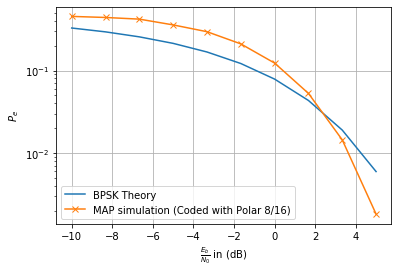

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from src.communications import Transmitter, AWGNChannel, Receiver
from src.utils import *

# Configuration
MODULATION = 'BPSK'
EbN0dBs = np.linspace(-10, 5, 10)
G = get_fec_matrix('POLAR_8_16')

# Initialization
transmitter = Transmitter(MODULATION, G)
receiver = Receiver(MODULATION, G)

channel = AWGNChannel(get_bps(MODULATION), transmitter.block_length, transmitter.block_coded_length)

if __name__ == '__main__':
    BER = ber_performance(
        EbN0dBs,
        get_basic_channel_fct(transmitter, channel, receiver),
        np.size(G, 0) * 1000,
        500
    )

    # Plot results
    plt.figure()
    show_ber(MODULATION, EbN0dBs, BER)
    plt.legend(['BPSK Theory', 'MAP simulation (Coded with Polar 8/16)'])
    plt.show()
    
#     np.savetxt('outputs/BER_G_MAP.csv', [
#         np.array(EbN0dBs),
#         np.array(BER)
#     ], delimiter=',')